## **Importing necessary libraries**

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis

import numpy as np  # library used for working with arrays

import matplotlib.pyplot as plt  # library for visualization

import seaborn as sns  # library for visualization

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

# Binomial Distribution

### Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures.  Historically, the failure rate for LED light bulbs that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.

In [2]:
p   =  0.05 # failure rate for LED light bulbs that the company manufactures is 5%
n   =  10 # sample size
k   =  np.arange(0,11) # an array of different possible number of defective bulbs

In [3]:
binomial = stats.binom.pmf(k,n,p)

In [5]:
print(binomial)

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789062e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


**Plot the binomial distribution**

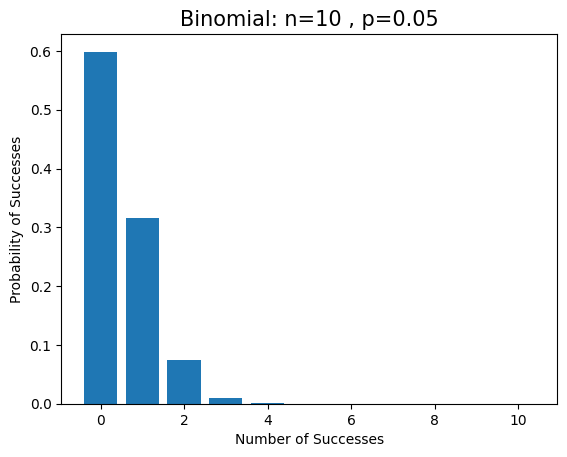

In [6]:
# plot the distribution
plt.bar(k,binomial)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
plt.show()

**a) What is the probability that none of the LED bulbs are defective?**

In [7]:
print('The probability that none of the LED bulbs are defective is %1.4f' %binomial[0])

The probability that none of the LED bulbs are defective is 0.5987


**b) What is the probability that exactly one of the LED bulbs is defective?**

In [8]:
print('The probability that exactly one of the LED bulbs is defective is %1.4f' %binomial[1])

The probability that exactly one of the LED bulbs is defective is 0.3151


**c) What is the probability that two or fewer of the LED bulbs are defective?**

Hint: We need to calculate cumulative probability of two or fewer LED bulbs being defective.

In [9]:
cumulative_binomial = stats.binom.cdf(k,n,p)

In [10]:
print('The probability that two or fewer of the LED bulbs are defective is %1.4f' %cumulative_binomial[2])

The probability that two or fewer of the LED bulbs are defective is 0.9885


**d) What is the probability that three or more of the LED bulbs are defective?**

Hint: We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [11]:
P = 1- cumulative_binomial[2]
print('The probability that three or more of the LED bulbs are defective is %1.4f' % P)

The probability that three or more of the LED bulbs are defective is 0.0115


### Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of free-throw shots is 93%. Find the following probabilities.

In [15]:
success=0.93

**a) What is the probability that the player will convert both the shots?**

In [16]:
print('The probability that the player will convert both the shots is',round(stats.binom.pmf(2,2,0.93),4))

The probability that the player will convert both the shots is 0.8649


**b) What is the probability that the player will convert at least one shot?**

In [17]:
print('The probability that the player will convert at least one shot is',round((1 - stats.binom.cdf(0,2,0.93)),4))

The probability that the player will convert at least one shot is 0.9951


### Q3.	Over a long period in a large multinomial corporation, 10% of all sales trainees are rated as outstanding, 75% are rated as excellent, 10% are rated as satisfactory and 5% are considered unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.

**a) Two are rated as outstanding**

In [18]:
p=0.1
n=10
k=2
binomial = stats.binom.pmf(k,n,p)
print('Probability that two trainees are rated as outstanding is %1.5f' % binomial )

Probability that two trainees are rated as outstanding is 0.19371


**b) Two or more are rated as outstanding**

In [19]:
p=0.1
n=10
k=1

##To  answer this we need to calculate the cumulative probability
binomial = stats.binom.cdf(k,n,p)

#since we have calculated for 1 or less, for two or more we will subtract this prob from 1
print('Probability that two or more trainees are rated as outstanding is %1.5f' % (1-binomial))

Probability that two or more trainees are rated as outstanding is 0.26390


**c) Eight of the ten are rated either outstanding or excellent**

In [20]:
#Probability of excellent or outstanding is 0.75 + 0.10

p=0.85
n=10
k=8
binomial = stats.binom.pmf(k,n,p)
print('Probability that eight out of ten trainees are rated either excellent or outstanding is %1.5f' % binomial)

Probability that eight out of ten trainees are rated either excellent or outstanding is 0.27590


**d) None of the trainees are rated as unsatisfactory**

In [21]:
p=0.05
n=10
k=0
binomial = stats.binom.pmf(k,n,p)
print('Probability of no trainees are unsatisfactory is %1.5f' % binomial )

Probability of no trainees are unsatisfactory is 0.59874


# Normal Distribution

### Q4. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850 with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.

**a) What is the probability that a randomly selected cell phone bill is more than Rs 1200?**

In [22]:
#To calculate this, we will calculate the cumulative probability for less than 1200 and then will subtract from 1.

round(1-stats.norm.cdf(1200,loc=850,scale=150), 4)

0.0098

**b) What is the probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200?**

In [23]:
round(stats.norm.cdf(1200,loc=850,scale=150) - stats.norm.cdf(750,loc=850,scale=150), 4)

0.7377

**c) What is the probability that a randomly selected cell phone bill is no more than Rs 650?**

In [24]:
round(stats.norm.cdf(650,loc=850,scale=150), 4)

0.0912

**d) What is the amount above which lies top 15% of cell phone bills?**

In [25]:
#Let the amount be M. P(X ≥ M) = 15% => 1 – P(X < M) = 0.15 => P(X < M) = 0.85
#To calculate this we will use the percent point function i.e ppf.

stats.norm.ppf(0.85,loc=850,scale=150)

1005.4650084240685

**e) What is the amount below which lies bottom 25% of cell phone bills?**

In [26]:
round(stats.norm.ppf(0.25,loc=850,scale=150), 4)

748.8265

### Q5. The mean filling capacity for a coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.

In [27]:
mu = 500
sigma = 20

**a) What is the probability that the bottle filled less than 480 ml?**

In [28]:
x1=480
z1=(x1-mu)/sigma
p=stats.norm.cdf(z1)
print ('Probability of bottle filled less than 480 ml is %1.4f' %p)

Probability of bottle filled less than 480 ml is 0.1587


**b) What is the probability that the bottle filled more than 520 ml?**

In [29]:
x2=520
z2=(x2-mu)/sigma
p1= 1 - stats.norm.cdf(z2)
print ('probability of bottle filled more than 520 ml is %1.4f' %p1)

probability of bottle filled more than 520 ml is 0.1587


**c) What is the probability that the bottle filled between 470 ml to 525 ml?**

In [35]:
x3=470
z3=(x3-mu)/sigma
x4=525
z4=(x4-mu)/sigma
p2=stats.norm.cdf(z3)
p3=stats.norm.cdf(z4)
p4=p3-p2

print ('probability that the bottle filled between 470 ml to 525 ml is %1.4f' %p4)

probability that the bottle filled between 470 ml to 525 ml is 0.8275


### Q6. In 2 Liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.

In [36]:
mu     = 2
sigma  = 0.05

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [37]:
Prob = stats.norm.cdf(2,loc=mu,scale=sigma) - stats.norm.cdf(1.90,loc=mu,scale=sigma)
print("Probability that the bottle content is between 1.9 and 2 liters is %3.4f" % Prob)

Probability that the bottle content is between 1.9 and 2 liters is 0.4772


**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [38]:
Prob = stats.norm.cdf(2.1,loc=mu,scale=sigma) - stats.norm.cdf(1.9,loc=mu,scale=sigma)
print("Probability that the bottle content is between 1.9 and 2.1 liters is %3.4f" % Prob)

Probability that the bottle content is between 1.9 and 2.1 liters is 0.9545


**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [39]:
Prob1  =  stats.norm.cdf(1.9,loc=mu,scale=sigma)
Prob2  =  1 - stats.norm.cdf(2.1,loc=mu,scale=sigma)
print("Probability that the bottle content is below 1.9 liters or above 2.1 liters is %3.4f" % (Prob1 + Prob2))

Probability that the bottle content is below 1.9 liters or above 2.1 liters is 0.0455


**d) 99% of the bottles contains at least what amount of soft drink in them?**

In [40]:
Prob = stats.norm.ppf(0.01, loc = mu, scale = sigma)
print("99% of the bottles have at least",round(Prob,2),"Liters")

99% of the bottles have at least 1.88 Liters
